In [106]:
past_days = 1
future_days = 1
n_lags = int(96*past_days)
horizon = int(96*future_days)

In [2]:
import pandas as pd

In [3]:
utility_data=pd.read_csv('weatherkit_plus_load.csv')

In [4]:
utility_data.event_timestamp = utility_data.event_timestamp.apply(pd.to_datetime)

In [5]:
utility_data.head()

,event_timestamp,weatherkit_observed_temperature_C,weatherkit_observed_humidity_pc,weatherkit_observed_air_pressure_kPa,weatherkit_observed_cloud_cover_pc,weatherkit_observed_wind_direction_deg,weatherkit_observed_wind_speed_km_h,weatherkit_forecast_temp_C,weatherkit_forecast_humidity_pc,weatherkit_forecast_air_pressure_kPa,weatherkit_forecast_cloud_cover_pc,weatherkit_forecast_wind_direction_deg,weatherkit_forecast_wind_speed_km_h,load_MW
0,2023-02-11 00:30:00+05:30,22.21,70.0,101.357,0.0,359.0,7.19,21.99,72.0,101.369,0.0,1.0,7.06,256.024088
1,2023-02-11 00:45:00+05:30,22.25,69.0,101.354,0.0,2.0,7.25,21.99,72.0,101.369,0.0,1.0,7.06,251.899132
2,2023-02-11 01:00:00+05:30,22.10,70.0,101.344,0.0,4.0,7.21,21.99,72.0,101.369,0.0,1.0,7.06,248.695780
3,2023-02-11 01:15:00+05:30,21.95,70.0,101.333,0.0,6.0,7.15,21.99,72.0,101.369,0.0,1.0,7.06,245.879308
4,2023-02-11 01:30:00+05:30,21.80,70.0,101.322,0.0,8.0,7.09,21.35,73.0,101.334,0.0,6.0,7.37,243.583376


In [7]:
utility_data.event_timestamp.max()

Timestamp('2023-07-10 17:00:00+0530', tz='pytz.FixedOffset(330)')

In [8]:
utility_data['ts_month_of_year'] = utility_data.event_timestamp.apply(lambda x : x.month)

In [9]:
utility_data['ts_day_of_month'] = utility_data.event_timestamp.apply(lambda x : x.day)

In [10]:
utility_data['ts_day_of_week'] = utility_data.event_timestamp.apply(lambda x : x.dayofweek)

In [11]:
utility_data['ts_hour_of_day'] = utility_data.event_timestamp.apply(lambda x : x.hour)

In [12]:
utility_data['ts_minute_of_hour'] = utility_data.event_timestamp.apply(lambda x : x.minute)

In [13]:
utility_data.head()

,event_timestamp,weatherkit_observed_temperature_C,weatherkit_observed_humidity_pc,weatherkit_observed_air_pressure_kPa,weatherkit_observed_cloud_cover_pc,weatherkit_observed_wind_direction_deg,weatherkit_observed_wind_speed_km_h,weatherkit_forecast_temp_C,weatherkit_forecast_humidity_pc,weatherkit_forecast_air_pressure_kPa,weatherkit_forecast_cloud_cover_pc,weatherkit_forecast_wind_direction_deg,weatherkit_forecast_wind_speed_km_h,load_MW,ts_month_of_year,ts_day_of_month,ts_day_of_week,ts_hour_of_day,ts_minute_of_hour
0,2023-02-11 00:30:00+05:30,22.21,70.0,101.357,0.0,359.0,7.19,21.99,72.0,101.369,0.0,1.0,7.06,256.024088,2,11,5,0,30
1,2023-02-11 00:45:00+05:30,22.25,69.0,101.354,0.0,2.0,7.25,21.99,72.0,101.369,0.0,1.0,7.06,251.899132,2,11,5,0,45
2,2023-02-11 01:00:00+05:30,22.10,70.0,101.344,0.0,4.0,7.21,21.99,72.0,101.369,0.0,1.0,7.06,248.695780,2,11,5,1,0
3,2023-02-11 01:15:00+05:30,21.95,70.0,101.333,0.0,6.0,7.15,21.99,72.0,101.369,0.0,1.0,7.06,245.879308,2,11,5,1,15
4,2023-02-11 01:30:00+05:30,21.80,70.0,101.322,0.0,8.0,7.09,21.35,73.0,101.334,0.0,6.0,7.37,243.583376,2,11,5,1,30


In [14]:
target_var = 'load_MW'

In [15]:
predictor_variables = [col for col in utility_data.columns if col not in ['event_timestamp',target_var]]
predictor_variables

['weatherkit_observed_temperature_C',
 'weatherkit_observed_humidity_pc',
 'weatherkit_observed_air_pressure_kPa',
 'weatherkit_observed_cloud_cover_pc',
 'weatherkit_observed_wind_direction_deg',
 'weatherkit_observed_wind_speed_km_h',
 'weatherkit_forecast_temp_C',
 'weatherkit_forecast_humidity_pc',
 'weatherkit_forecast_air_pressure_kPa',
 'weatherkit_forecast_cloud_cover_pc',
 'weatherkit_forecast_wind_direction_deg',
 'weatherkit_forecast_wind_speed_km_h',
 'ts_month_of_year',
 'ts_day_of_month',
 'ts_day_of_week',
 'ts_hour_of_day',
 'ts_minute_of_hour']

In [16]:
observed_vars = [col for col in predictor_variables if 'observed' in col]
observed_vars

['weatherkit_observed_temperature_C',
 'weatherkit_observed_humidity_pc',
 'weatherkit_observed_air_pressure_kPa',
 'weatherkit_observed_cloud_cover_pc',
 'weatherkit_observed_wind_direction_deg',
 'weatherkit_observed_wind_speed_km_h']

In [17]:
forecast_vars = [col for col in predictor_variables if 'forecast' in col] # or 'ts_' in col)]
forecast_vars

['weatherkit_forecast_temp_C',
 'weatherkit_forecast_humidity_pc',
 'weatherkit_forecast_air_pressure_kPa',
 'weatherkit_forecast_cloud_cover_pc',
 'weatherkit_forecast_wind_direction_deg',
 'weatherkit_forecast_wind_speed_km_h']

In [64]:
ts_vars = [col for col in predictor_variables if 'ts_' in col]
ts_vars.append('event_timestamp')
ts_vars

['ts_month_of_year',
 'ts_day_of_month',
 'ts_day_of_week',
 'ts_hour_of_day',
 'ts_minute_of_hour',
 'event_timestamp']

In [19]:
import matplotlib.pyplot as plt
import numpy as np

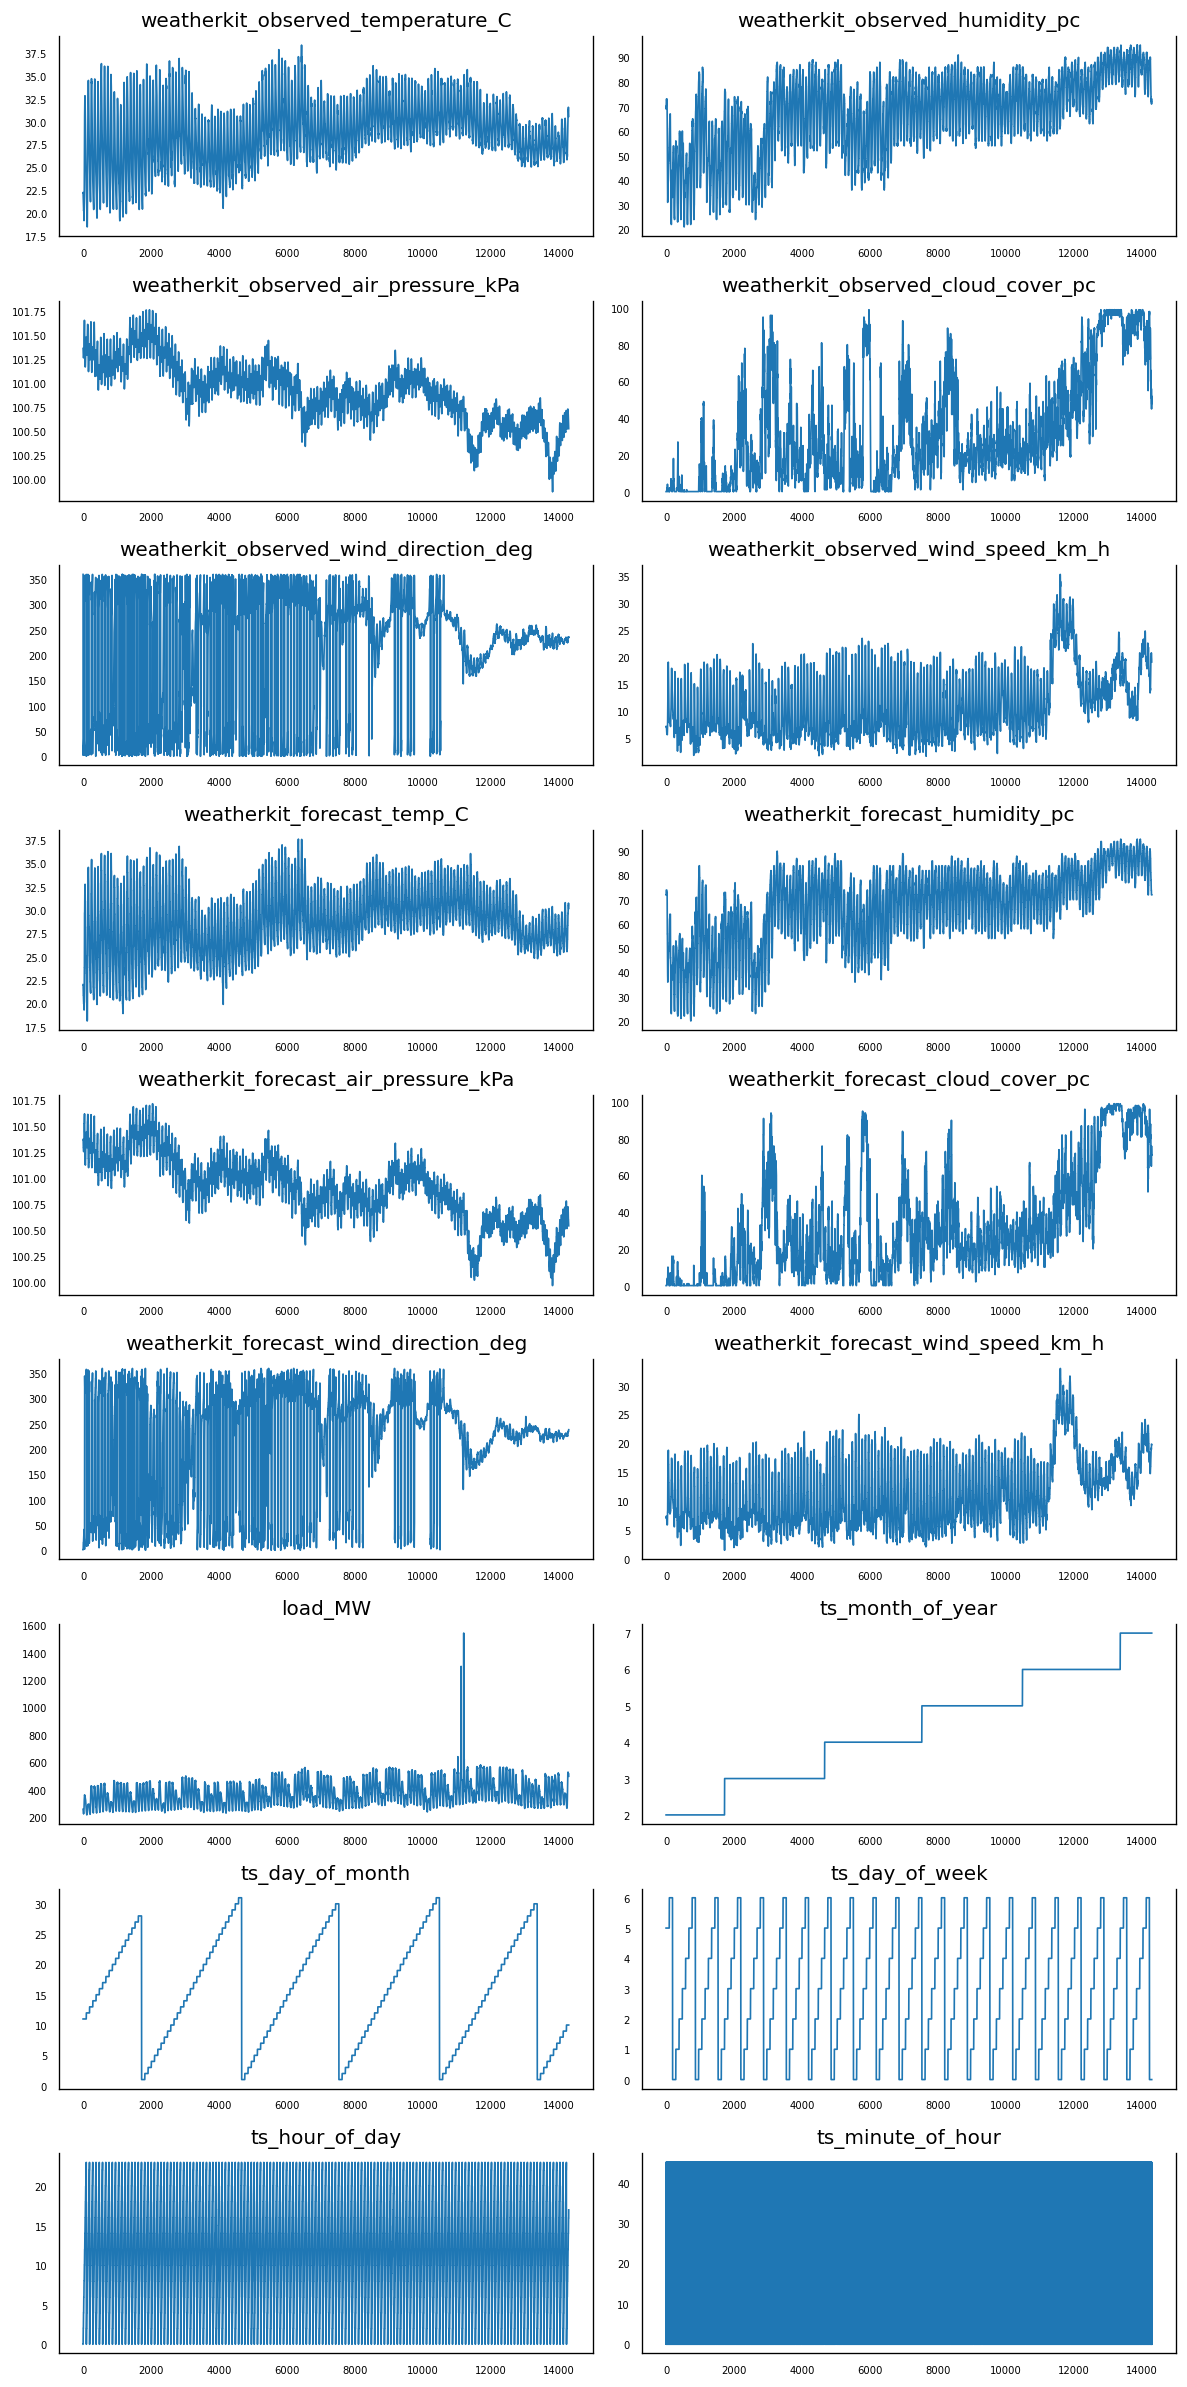

In [20]:
import matplotlib.pyplot as plt
df = utility_data[utility_data.columns[1:]]
fig, axes = plt.subplots(nrows=9, ncols=2, dpi=120, figsize=(10,20))
for i, ax in enumerate(axes.flatten()):
    try:
        data = df[df.columns[i]]
        ax.plot(data, linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=6)
    except:
        pass

plt.tight_layout()

In [21]:
utility_data.columns

Index(['event_timestamp', 'weatherkit_observed_temperature_C',
       'weatherkit_observed_humidity_pc',
       'weatherkit_observed_air_pressure_kPa',
       'weatherkit_observed_cloud_cover_pc',
       'weatherkit_observed_wind_direction_deg',
       'weatherkit_observed_wind_speed_km_h', 'weatherkit_forecast_temp_C',
       'weatherkit_forecast_humidity_pc',
       'weatherkit_forecast_air_pressure_kPa',
       'weatherkit_forecast_cloud_cover_pc',
       'weatherkit_forecast_wind_direction_deg',
       'weatherkit_forecast_wind_speed_km_h', 'load_MW', 'ts_month_of_year',
       'ts_day_of_month', 'ts_day_of_week', 'ts_hour_of_day',
       'ts_minute_of_hour'],
      dtype='object')

In [22]:
observed_vars

['weatherkit_observed_temperature_C',
 'weatherkit_observed_humidity_pc',
 'weatherkit_observed_air_pressure_kPa',
 'weatherkit_observed_cloud_cover_pc',
 'weatherkit_observed_wind_direction_deg',
 'weatherkit_observed_wind_speed_km_h']

In [23]:
forecast_vars

['weatherkit_forecast_temp_C',
 'weatherkit_forecast_humidity_pc',
 'weatherkit_forecast_air_pressure_kPa',
 'weatherkit_forecast_cloud_cover_pc',
 'weatherkit_forecast_wind_direction_deg',
 'weatherkit_forecast_wind_speed_km_h']

In [24]:
ts_vars

['ts_month_of_year',
 'ts_day_of_month',
 'ts_day_of_week',
 'ts_hour_of_day',
 'ts_minute_of_hour']

In [25]:
target_var

'load_MW'

In [107]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from sklearn.model_selection import train_test_split
from src.tde import time_delay_embedding

# create data set with lagged features using time delay embedding
utility_data_ds = []
for col in utility_data.columns:
    if col in observed_vars: 
        col_df = time_delay_embedding(utility_data[col], n_lags=n_lags, horizon=0)
        utility_data_ds.append(col_df.copy())
    elif col in forecast_vars: 
        col_df = time_delay_embedding(utility_data[col], n_lags=n_lags, horizon=horizon)
        utility_data_ds.append(col_df.copy())
    elif col in ts_vars: 
        col_df = utility_data[col]
        utility_data_ds.append(col_df.copy())
    elif col in [target_var]:
        col_df = time_delay_embedding(utility_data[col], n_lags=n_lags, horizon=horizon)
        utility_data_ds.append(col_df.copy())

# concatenating all variables
utility_data_df = pd.concat(utility_data_ds, axis=1).dropna()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
utility_data_df.event_timestamp.min()

Timestamp('2023-02-13 00:30:00+0530', tz='pytz.FixedOffset(330)')

In [144]:
utility_data_df.event_timestamp.max()

Timestamp('2023-07-09 17:00:00+0530', tz='pytz.FixedOffset(330)')

In [112]:
target_variables = utility_data_df.columns.str.contains(f'{target_var}\(t\+')
target_variables = utility_data_df.columns[target_variables]

In [113]:
target_variables.tolist()

['load_MW(t+1)',
 'load_MW(t+2)',
 'load_MW(t+3)',
 'load_MW(t+4)',
 'load_MW(t+5)',
 'load_MW(t+6)',
 'load_MW(t+7)',
 'load_MW(t+8)',
 'load_MW(t+9)',
 'load_MW(t+10)',
 'load_MW(t+11)',
 'load_MW(t+12)',
 'load_MW(t+13)',
 'load_MW(t+14)',
 'load_MW(t+15)',
 'load_MW(t+16)',
 'load_MW(t+17)',
 'load_MW(t+18)',
 'load_MW(t+19)',
 'load_MW(t+20)',
 'load_MW(t+21)',
 'load_MW(t+22)',
 'load_MW(t+23)',
 'load_MW(t+24)',
 'load_MW(t+25)',
 'load_MW(t+26)',
 'load_MW(t+27)',
 'load_MW(t+28)',
 'load_MW(t+29)',
 'load_MW(t+30)',
 'load_MW(t+31)',
 'load_MW(t+32)',
 'load_MW(t+33)',
 'load_MW(t+34)',
 'load_MW(t+35)',
 'load_MW(t+36)',
 'load_MW(t+37)',
 'load_MW(t+38)',
 'load_MW(t+39)',
 'load_MW(t+40)',
 'load_MW(t+41)',
 'load_MW(t+42)',
 'load_MW(t+43)',
 'load_MW(t+44)',
 'load_MW(t+45)',
 'load_MW(t+46)',
 'load_MW(t+47)',
 'load_MW(t+48)',
 'load_MW(t+49)',
 'load_MW(t+50)',
 'load_MW(t+51)',
 'load_MW(t+52)',
 'load_MW(t+53)',
 'load_MW(t+54)',
 'load_MW(t+55)',
 'load_MW(t+56)',
 

In [116]:
predictor_variables = [col for col in utility_data_df.columns if col not in target_variables]
predictor_variables.remove('event_timestamp')
predictor_variables

['weatherkit_observed_temperature_C(t-191)',
 'weatherkit_observed_temperature_C(t-190)',
 'weatherkit_observed_temperature_C(t-189)',
 'weatherkit_observed_temperature_C(t-188)',
 'weatherkit_observed_temperature_C(t-187)',
 'weatherkit_observed_temperature_C(t-186)',
 'weatherkit_observed_temperature_C(t-185)',
 'weatherkit_observed_temperature_C(t-184)',
 'weatherkit_observed_temperature_C(t-183)',
 'weatherkit_observed_temperature_C(t-182)',
 'weatherkit_observed_temperature_C(t-181)',
 'weatherkit_observed_temperature_C(t-180)',
 'weatherkit_observed_temperature_C(t-179)',
 'weatherkit_observed_temperature_C(t-178)',
 'weatherkit_observed_temperature_C(t-177)',
 'weatherkit_observed_temperature_C(t-176)',
 'weatherkit_observed_temperature_C(t-175)',
 'weatherkit_observed_temperature_C(t-174)',
 'weatherkit_observed_temperature_C(t-173)',
 'weatherkit_observed_temperature_C(t-172)',
 'weatherkit_observed_temperature_C(t-171)',
 'weatherkit_observed_temperature_C(t-170)',
 'weatherk

In [146]:
# defining target (Y) and explanatory variables (X)
X = utility_data_df[predictor_variables]
Y = utility_data_df[target_variables]

In [152]:
utility_data_df[test_msk]

,event_timestamp,weatherkit_observed_temperature_C(t-191),weatherkit_observed_temperature_C(t-190),weatherkit_observed_temperature_C(t-189),weatherkit_observed_temperature_C(t-188),weatherkit_observed_temperature_C(t-187),weatherkit_observed_temperature_C(t-186),weatherkit_observed_temperature_C(t-185),weatherkit_observed_temperature_C(t-184),weatherkit_observed_temperature_C(t-183),weatherkit_observed_temperature_C(t-182),weatherkit_observed_temperature_C(t-181),weatherkit_observed_temperature_C(t-180),weatherkit_observed_temperature_C(t-179),weatherkit_observed_temperature_C(t-178),weatherkit_observed_temperature_C(t-177),weatherkit_observed_temperature_C(t-176),weatherkit_observed_temperature_C(t-175),weatherkit_observed_temperature_C(t-174),weatherkit_observed_temperature_C(t-173),weatherkit_observed_temperature_C(t-172),weatherkit_observed_temperature_C(t-171),weatherkit_observed_temperature_C(t-170),weatherkit_observed_temperature_C(t-169),weatherkit_observed_temperature_C(t-168),weatherkit_observed_temperature_C(t-167),weatherkit_observed_temperature_C(t-166),weatherkit_observed_temperature_C(t-165),weatherkit_observed_temperature_C(t-164),weatherkit_observed_temperature_C(t-163),weatherkit_observed_temperature_C(t-162),weatherkit_observed_temperature_C(t-161),weatherkit_observed_temperature_C(t-160),weatherkit_observed_temperature_C(t-159),weatherkit_observed_temperature_C(t-158),weatherkit_observed_temperature_C(t-157),weatherkit_observed_temperature_C(t-156),weatherkit_observed_temperature_C(t-155),weatherkit_observed_temperature_C(t-154),weatherkit_observed_temperature_C(t-153),weatherkit_observed_temperature_C(t-152),weatherkit_observed_temperature_C(t-151),weatherkit_observed_temperature_C(t-150),weatherkit_observed_temperature_C(t-149),weatherkit_observed_temperature_C(t-148),weatherkit_observed_temperature_C(t-147),weatherkit_observed_temperature_C(t-146),weatherkit_observed_temperature_C(t-145),weatherkit_observed_temperature_C(t-144),weatherkit_observed_temperature_C(t-143),weatherkit_observed_temperature_C(t-142),weatherkit_observed_temperature_C(t-141),weatherkit_observed_temperature_C(t-140),weatherkit_observed_temperature_C(t-139),weatherkit_observed_temperature_C(t-138),weatherkit_observed_temperature_C(t-137),weatherkit_observed_temperature_C(t-136),weatherkit_observed_temperature_C(t-135),weatherkit_observed_temperature_C(t-134),weatherkit_observed_temperature_C(t-133),weatherkit_observed_temperature_C(t-132),weatherkit_observed_temperature_C(t-131),weatherkit_observed_temperature_C(t-130),weatherkit_observed_temperature_C(t-129),weatherkit_observed_temperature_C(t-128),weatherkit_observed_temperature_C(t-127),weatherkit_observed_temperature_C(t-126),weatherkit_observed_temperature_C(t-125),weatherkit_observed_temperature_C(t-124),weatherkit_observed_temperature_C(t-123),weatherkit_observed_temperature_C(t-122),weatherkit_observed_temperature_C(t-121),weatherkit_observed_temperature_C(t-120),weatherkit_observed_temperature_C(t-119),weatherkit_observed_temperature_C(t-118),weatherkit_observed_temperature_C(t-117),weatherkit_observed_temperature_C(t-116),weatherkit_observed_temperature_C(t-115),weatherkit_observed_temperature_C(t-114),weatherkit_observed_temperature_C(t-113),weatherkit_observed_temperature_C(t-112),weatherkit_observed_temperature_C(t-111),weatherkit_observed_temperature_C(t-110),weatherkit_observed_temperature_C(t-109),weatherkit_observed_temperature_C(t-108),weatherkit_observed_temperature_C(t-107),weatherkit_observed_temperature_C(t-106),weatherkit_observed_temperature_C(t-105),weatherkit_observed_temperature_C(t-104),weatherkit_observed_temperature_C(t-103),weatherkit_observed_temperature_C(t-102),weatherkit_observed_temperature_C(t-101),weatherkit_observed_temperature_C(t-100),weatherkit_observed_temperature_C(t-99),weatherkit_observed_temperature_C(t-98),weatherkit_observed_temperature_C(t-97),weatherkit_observed_temperature_C(t-96),weatherkit_observed_temperature_C(t-95),weatherkit_

In [153]:
X_ts

,weatherkit_observed_temperature_C(t-191),weatherkit_observed_temperature_C(t-190),weatherkit_observed_temperature_C(t-189),weatherkit_observed_temperature_C(t-188),weatherkit_observed_temperature_C(t-187),weatherkit_observed_temperature_C(t-186),weatherkit_observed_temperature_C(t-185),weatherkit_observed_temperature_C(t-184),weatherkit_observed_temperature_C(t-183),weatherkit_observed_temperature_C(t-182),weatherkit_observed_temperature_C(t-181),weatherkit_observed_temperature_C(t-180),weatherkit_observed_temperature_C(t-179),weatherkit_observed_temperature_C(t-178),weatherkit_observed_temperature_C(t-177),weatherkit_observed_temperature_C(t-176),weatherkit_observed_temperature_C(t-175),weatherkit_observed_temperature_C(t-174),weatherkit_observed_temperature_C(t-173),weatherkit_observed_temperature_C(t-172),weatherkit_observed_temperature_C(t-171),weatherkit_observed_temperature_C(t-170),weatherkit_observed_temperature_C(t-169),weatherkit_observed_temperature_C(t-168),weatherkit_observed_temperature_C(t-167),weatherkit_observed_temperature_C(t-166),weatherkit_observed_temperature_C(t-165),weatherkit_observed_temperature_C(t-164),weatherkit_observed_temperature_C(t-163),weatherkit_observed_temperature_C(t-162),weatherkit_observed_temperature_C(t-161),weatherkit_observed_temperature_C(t-160),weatherkit_observed_temperature_C(t-159),weatherkit_observed_temperature_C(t-158),weatherkit_observed_temperature_C(t-157),weatherkit_observed_temperature_C(t-156),weatherkit_observed_temperature_C(t-155),weatherkit_observed_temperature_C(t-154),weatherkit_observed_temperature_C(t-153),weatherkit_observed_temperature_C(t-152),weatherkit_observed_temperature_C(t-151),weatherkit_observed_temperature_C(t-150),weatherkit_observed_temperature_C(t-149),weatherkit_observed_temperature_C(t-148),weatherkit_observed_temperature_C(t-147),weatherkit_observed_temperature_C(t-146),weatherkit_observed_temperature_C(t-145),weatherkit_observed_temperature_C(t-144),weatherkit_observed_temperature_C(t-143),weatherkit_observed_temperature_C(t-142),weatherkit_observed_temperature_C(t-141),weatherkit_observed_temperature_C(t-140),weatherkit_observed_temperature_C(t-139),weatherkit_observed_temperature_C(t-138),weatherkit_observed_temperature_C(t-137),weatherkit_observed_temperature_C(t-136),weatherkit_observed_temperature_C(t-135),weatherkit_observed_temperature_C(t-134),weatherkit_observed_temperature_C(t-133),weatherkit_observed_temperature_C(t-132),weatherkit_observed_temperature_C(t-131),weatherkit_observed_temperature_C(t-130),weatherkit_observed_temperature_C(t-129),weatherkit_observed_temperature_C(t-128),weatherkit_observed_temperature_C(t-127),weatherkit_observed_temperature_C(t-126),weatherkit_observed_temperature_C(t-125),weatherkit_observed_temperature_C(t-124),weatherkit_observed_temperature_C(t-123),weatherkit_observed_temperature_C(t-122),weatherkit_observed_temperature_C(t-121),weatherkit_observed_temperature_C(t-120),weatherkit_observed_temperature_C(t-119),weatherkit_observed_temperature_C(t-118),weatherkit_observed_temperature_C(t-117),weatherkit_observed_temperature_C(t-116),weatherkit_observed_temperature_C(t-115),weatherkit_observed_temperature_C(t-114),weatherkit_observed_temperature_C(t-113),weatherkit_observed_temperature_C(t-112),weatherkit_observed_temperature_C(t-111),weatherkit_observed_temperature_C(t-110),weatherkit_observed_temperature_C(t-109),weatherkit_observed_temperature_C(t-108),weatherkit_observed_temperature_C(t-107),weatherkit_observed_temperature_C(t-106),weatherkit_observed_temperature_C(t-105),weatherkit_observed_temperature_C(t-104),weatherkit_observed_temperature_C(t-103),weatherkit_observed_temperature_C(t-102),weatherkit_observed_temperature_C(t-101),weatherkit_observed_temperature_C(t-100),weatherkit_observed_temperature_C(t-99),weatherkit_observed_temperature_C(t-98),weatherkit_observed_temperature_C(t-97),weatherkit_observed_temperature_C(t-96),weatherkit_observed_temperature_C(t-95),weatherkit_observed_tempera

In [154]:
Y_ts

,load_MW(t+1),load_MW(t+2),load_MW(t+3),load_MW(t+4),load_MW(t+5),load_MW(t+6),load_MW(t+7),load_MW(t+8),load_MW(t+9),load_MW(t+10),load_MW(t+11),load_MW(t+12),load_MW(t+13),load_MW(t+14),load_MW(t+15),load_MW(t+16),load_MW(t+17),load_MW(t+18),load_MW(t+19),load_MW(t+20),load_MW(t+21),load_MW(t+22),load_MW(t+23),load_MW(t+24),load_MW(t+25),load_MW(t+26),load_MW(t+27),load_MW(t+28),load_MW(t+29),load_MW(t+30),load_MW(t+31),load_MW(t+32),load_MW(t+33),load_MW(t+34),load_MW(t+35),load_MW(t+36),load_MW(t+37),load_MW(t+38),load_MW(t+39),load_MW(t+40),load_MW(t+41),load_MW(t+42),load_MW(t+43),load_MW(t+44),load_MW(t+45),load_MW(t+46),load_MW(t+47),load_MW(t+48),load_MW(t+49),load_MW(t+50),load_MW(t+51),load_MW(t+52),load_MW(t+53),load_MW(t+54),load_MW(t+55),load_MW(t+56),load_MW(t+57),load_MW(t+58),load_MW(t+59),load_MW(t+60),load_MW(t+61),load_MW(t+62),load_MW(t+63),load_MW(t+64),load_MW(t+65),load_MW(t+66),load_MW(t+67),load_MW(t+68),load_MW(t+69),load_MW(t+70),load_MW(t+71),load_MW(t+72),load_MW(t+73),load_MW(t+74),load_MW(t+75),load_MW(t+76),load_MW(t+77),load_MW(t+78),load_MW(t+79),load_MW(t+80),load_MW(t+81),load_MW(t+82),load_MW(t+83),load_MW(t+84),load_MW(t+85),load_MW(t+86),load_MW(t+87),load_MW(t+88),load_MW(t+89),load_MW(t+90),load_MW(t+91),load_MW(t+92),load_MW(t+93),load_MW(t+94),load_MW(t+95),load_MW(t+96)
12889,322.042449,316.493975,311.833215,309.404465,307.002758,305.090384,301.809478,300.781664,297.080347,295.180745,290.642489,288.813175,285.872067,285.518115,283.371102,284.139227,286.179602,288.309727,286.201309,285.672497,284.091976,287.678716,291.619859,295.082985,304.010586,309.491940,317.359203,326.095204,337.621890,352.154869,369.893191,386.058641,406.390030,426.122023,445.111066,464.648139,478.167965,496.463963,506.899427,517.005292,526.900350,534.131797,533.237315,539.072038,541.556039,542.262245,543.609522,538.969361,538.646725,536.828493,539.007361,533.768997,532.524470,528.342064,525.307682,520.089423,519.112723,516.427498,520.053894,517.554849,509.470660,504.647217,505.343511,504.050087,499.134340,494.854919,490.125118,487.232192,482.522071,480.167636,477.569242,466.608599,456.930619,451.215111,443.604233,435.323535,427.634368,422.633762,420.881895,416.974323,405.126149,399.809489,394.788265,391.519526,386.315425,380.701576,377.406581,375.232913,365.441045,364.628435,359.591714,354.814756,348.512880,343.614003,313.845672,336.635369
12890,316.493975,311.833215,309.404465,307.002758,305.090384,301.809478,300.781664,297.080347,295.180745,290.642489,288.813175,285.872067,285.518115,283.371102,284.139227,286.179602,288.309727,286.201309,285.672497,284.091976,287.678716,291.619859,295.082985,304.010586,309.491940,317.359203,326.095204,337.621890,352.154869,369.893191,386.058641,406.390030,426.122023,445.111066,464.648139,478.167965,496.463963,506.899427,517.005292,526.900350,534.131797,533.237315,539.072038,541.556039,542.262245,543.609522,538.969361,538.646725,536.828493,539.007361,533.768997,532.524470,528.342064,525.307682,520.089423,519.112723,516.427498,520.053894,517.554849,509.470660,504.647217,505.343511,504.050087,499.134340,494.854919,490.125118,487.232192,482.522071,480.167636,477.569242,466.608599,456.930619,451.215111,443.604233,435.323535,427.634368,422.633762,420.881895,416.974323,405.126149,399.809489,394.788265,391.519526,386.315425,380.701576,377.406581,375.232913,365.441045,364.628435,359.591714,354.814756,348.512880,343.614003,313.845672,336.635369,309.000000
12891,311.833215,309.404465,307.002758,305.090384,301.809478,300.781664,297.080347,295.180745,290.642489,288.813175,285.872067,285.518115,283.371102,284.139227,286.179602,288.309727,286.201309,285.672497,284.091976,287.678716,291.619859,295.082985,304.010586,309.491940,317.359203,326.095204,337.621890,352.154869,369.893191,386.058641,406.390030,426.122023,445.111066,464.648139,478.167965,496.463963,506.899427,517.005292,526.900350,534.131797,533.237315,539.072038,541.556039,542.262245,543.609522,538.969361,538.646725,536.828493,539.00

In [147]:
month_days = X.ts_month_of_year.astype(str)+'-'+X.ts_day_of_month.astype(str)

In [150]:
days_ts

array(['6-26', '6-27', '6-28', '6-29', '6-30', '7-1', '7-2', '7-3', '7-4',
       '7-5', '7-6', '7-7', '7-8', '7-9'], dtype=object)

In [148]:
# train/test split
days_tr,days_ts = train_test_split(month_days.unique(), test_size=14, shuffle=False)
# days_tr,days_val = train_test_split(days_tr_val, test_size=14, shuffle=False)
train_msk = month_days.isin(days_tr)
# val_msk = month_days.isin(days_val)
test_msk = month_days.isin(days_ts)
# X_tr, X_val, X_ts  = X[train_msk],X[val_msk],X[test_msk]
# Y_tr, Y_val, Y_ts = Y[train_msk],Y[val_msk],Y[test_msk]
X_tr, X_ts  = X[train_msk],X[test_msk]
Y_tr, Y_ts = Y[train_msk],Y[test_msk]

In [35]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.multioutput import MultiOutputRegressor
from lightgbm import LGBMRegressor
from lightgbm import early_stopping

# fitting a lgbm model
model = MultiOutputRegressor(LGBMRegressor(n_estimators = 100),n_jobs=-1)
model.fit(X_tr, Y_tr)

MultiOutputRegressor(estimator=LGBMRegressor(), n_jobs=-1)

In [121]:
daily_preds_msk = ((X_ts.ts_hour_of_day == 8) & (X_ts.ts_minute_of_hour ==0))
X_ts_sub = X_ts[daily_preds_msk]

In [122]:
daily_preds_msk.sum()

14

In [123]:
preds_ts_sub = model.predict(X_ts_sub)

In [133]:
preds_ts_sub.reshape(-1).shape

(1344,)

In [136]:
Y_ts[daily_preds_msk].values.reshape(-1).shape

(1344,)

In [128]:
utility_data_df[test_msk].event_timestamp.shape

(1314,)

In [130]:
utility_data_df[test_msk]

,event_timestamp,weatherkit_observed_temperature_C(t-191),weatherkit_observed_temperature_C(t-190),weatherkit_observed_temperature_C(t-189),weatherkit_observed_temperature_C(t-188),weatherkit_observed_temperature_C(t-187),weatherkit_observed_temperature_C(t-186),weatherkit_observed_temperature_C(t-185),weatherkit_observed_temperature_C(t-184),weatherkit_observed_temperature_C(t-183),weatherkit_observed_temperature_C(t-182),weatherkit_observed_temperature_C(t-181),weatherkit_observed_temperature_C(t-180),weatherkit_observed_temperature_C(t-179),weatherkit_observed_temperature_C(t-178),weatherkit_observed_temperature_C(t-177),weatherkit_observed_temperature_C(t-176),weatherkit_observed_temperature_C(t-175),weatherkit_observed_temperature_C(t-174),weatherkit_observed_temperature_C(t-173),weatherkit_observed_temperature_C(t-172),weatherkit_observed_temperature_C(t-171),weatherkit_observed_temperature_C(t-170),weatherkit_observed_temperature_C(t-169),weatherkit_observed_temperature_C(t-168),weatherkit_observed_temperature_C(t-167),weatherkit_observed_temperature_C(t-166),weatherkit_observed_temperature_C(t-165),weatherkit_observed_temperature_C(t-164),weatherkit_observed_temperature_C(t-163),weatherkit_observed_temperature_C(t-162),weatherkit_observed_temperature_C(t-161),weatherkit_observed_temperature_C(t-160),weatherkit_observed_temperature_C(t-159),weatherkit_observed_temperature_C(t-158),weatherkit_observed_temperature_C(t-157),weatherkit_observed_temperature_C(t-156),weatherkit_observed_temperature_C(t-155),weatherkit_observed_temperature_C(t-154),weatherkit_observed_temperature_C(t-153),weatherkit_observed_temperature_C(t-152),weatherkit_observed_temperature_C(t-151),weatherkit_observed_temperature_C(t-150),weatherkit_observed_temperature_C(t-149),weatherkit_observed_temperature_C(t-148),weatherkit_observed_temperature_C(t-147),weatherkit_observed_temperature_C(t-146),weatherkit_observed_temperature_C(t-145),weatherkit_observed_temperature_C(t-144),weatherkit_observed_temperature_C(t-143),weatherkit_observed_temperature_C(t-142),weatherkit_observed_temperature_C(t-141),weatherkit_observed_temperature_C(t-140),weatherkit_observed_temperature_C(t-139),weatherkit_observed_temperature_C(t-138),weatherkit_observed_temperature_C(t-137),weatherkit_observed_temperature_C(t-136),weatherkit_observed_temperature_C(t-135),weatherkit_observed_temperature_C(t-134),weatherkit_observed_temperature_C(t-133),weatherkit_observed_temperature_C(t-132),weatherkit_observed_temperature_C(t-131),weatherkit_observed_temperature_C(t-130),weatherkit_observed_temperature_C(t-129),weatherkit_observed_temperature_C(t-128),weatherkit_observed_temperature_C(t-127),weatherkit_observed_temperature_C(t-126),weatherkit_observed_temperature_C(t-125),weatherkit_observed_temperature_C(t-124),weatherkit_observed_temperature_C(t-123),weatherkit_observed_temperature_C(t-122),weatherkit_observed_temperature_C(t-121),weatherkit_observed_temperature_C(t-120),weatherkit_observed_temperature_C(t-119),weatherkit_observed_temperature_C(t-118),weatherkit_observed_temperature_C(t-117),weatherkit_observed_temperature_C(t-116),weatherkit_observed_temperature_C(t-115),weatherkit_observed_temperature_C(t-114),weatherkit_observed_temperature_C(t-113),weatherkit_observed_temperature_C(t-112),weatherkit_observed_temperature_C(t-111),weatherkit_observed_temperature_C(t-110),weatherkit_observed_temperature_C(t-109),weatherkit_observed_temperature_C(t-108),weatherkit_observed_temperature_C(t-107),weatherkit_observed_temperature_C(t-106),weatherkit_observed_temperature_C(t-105),weatherkit_observed_temperature_C(t-104),weatherkit_observed_temperature_C(t-103),weatherkit_observed_temperature_C(t-102),weatherkit_observed_temperature_C(t-101),weatherkit_observed_temperature_C(t-100),weatherkit_observed_temperature_C(t-99),weatherkit_observed_temperature_C(t-98),weatherkit_observed_temperature_C(t-97),weatherkit_observed_temperature_C(t-96),weatherkit_observed_temperature_C(t-95),weatherkit_

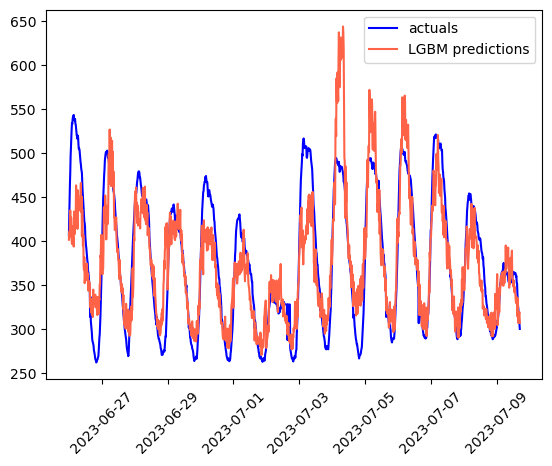

In [142]:
x = utility_data_df[test_msk].event_timestamp
y1 = Y_ts[daily_preds_msk].values.reshape(-1)[:x.shape[0]]
y2 = preds_ts_sub.reshape(-1)[:x.shape[0]]
plt.plot(x,y1,color='b',label='actuals')
plt.plot(x,y2,color='tomato',label='LGBM predictions')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [143]:
# Model evaluation
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print('MAPE: {:.2%}'.format(mape(y1, y2)))
print('RMSE: {:.4f}'.format(np.sqrt(mse(y1,y2))))
print('MAE: {:.4f}'.format(mae(y1,y2)))

MAPE: 7.98%
RMSE: 41.3866
MAE: 30.6895


In [59]:
pd.set_option('display.max_rows', 700)

In [60]:
feature_imp = pd.DataFrame(np.concatenate((np.array(X.columns).reshape(-1,1),
                model_wo_fe.estimators_[0].feature_importances_.reshape(-1,1)),axis=1),columns = ['feature','importance'])
feature_imp = feature_imp[feature_imp['importance']!=0].sort_values(by='importance',ascending=False)
feature_imp.importance=feature_imp.importance/feature_imp.importance.sum()

In [61]:
feature_imp.head(100)

,feature,importance
18047,load_MW(t),0.177
14540,weatherkit_forecast_wind_direction_deg(t-627),0.024333
5923,weatherkit_observed_wind_direction_deg(t-796),0.018667
17876,load_MW(t-171),0.017333
5737,weatherkit_observed_wind_direction_deg(t-982),0.017333
18051,ts_hour_of_day,0.014333
18046,load_MW(t-1),0.010333
17973,load_MW(t-74),0.009
14651,weatherkit_forecast_wind_direction_deg(t-516),0.008667
14465,weatherkit_forecast_wind_direction_deg(t-702),0.008667


In [62]:
X.columns.shape

(18053,)

In [63]:
all_imp = np.array([model_wo_fe.estimators_[i].feature_importances_ for i in range(len(model_wo_fe.estimators_))])

feature_imp = pd.DataFrame(np.concatenate((np.array(X.columns).reshape(-1,1),
                           all_imp.sum(axis=0).reshape(-1,1)),axis=1),
                           columns = ['feature','importance'])
feature_imp = feature_imp.sort_values(by='importance',ascending=False)

In [64]:
feature_imp.importance=feature_imp.importance/feature_imp.importance.sum()

In [65]:
feature_imp['cum_imp']=feature_imp.importance.cumsum()

In [71]:
feature_imp.head(200)

,feature,importance,cum_imp
18050,ts_day_of_week,0.01851,0.01851
18047,load_MW(t),0.01583,0.03434
18049,ts_day_of_month,0.009215,0.043556
18051,ts_hour_of_day,0.004417,0.047972
18046,load_MW(t-1),0.001747,0.049719
18045,load_MW(t-2),0.001104,0.050823
18044,load_MW(t-3),0.000944,0.051767
18042,load_MW(t-5),0.000896,0.052663
18040,load_MW(t-7),0.000889,0.053552
18041,load_MW(t-6),0.000872,0.054424


In [67]:
feature_imp.cum_imp.astype(float).describe(percentiles=[0.25,.5,.75,.8,.90,.95])

count    18053.000000
mean         0.751946
std          0.224623
min          0.018510
25%          0.607684
50%          0.817590
75%          0.942795
80%          0.959806
90%          0.986550
95%          0.995499
max          1.000000
Name: cum_imp, dtype: float64

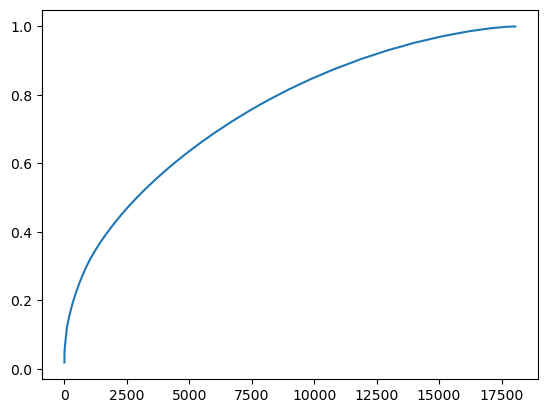

In [68]:
x = np.arange(feature_imp.shape[0])
y = feature_imp.cum_imp.astype(float)
plt.plot(x,y)
plt.show()

In [69]:
# 15033 out of 17765 features accounted for 98% of feature importance
# count    17765.000000
# mean         0.747985
# std          0.235062
# min          0.030375
# 25%          0.591424
# 50%          0.820361
# 75%          0.950812
# 80%          0.968600
# 90%          0.991921
# 95%          0.998089
# max          1.000000
# Name: cum_imp, dtype: float64

In [70]:
feature_imp.shape

(18053, 3)